# Data Wrangling with JSON

****

Here I will use a JSON file ('data/world_bank_projects.json') that contains information on government 
funded projects from across the globe to demostrate JSON data wrangling techniques.

## Import the Required Libraries 

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize

## Identify the top 10 countries in terms of projects funded

In [2]:
# Load into dataframe
with open('data/world_bank_projects.json') as file:
    json_df = pd.read_json(file)
    
# Count the number of projects each contry has and extract the top 10
top_10_countries = json_df.countryname.value_counts().head(10)
print(top_10_countries)

# Graph results
top_10_countries = top_10_countries.sort_values(ascending=True)
top_10_countries.plot(kind='barh')

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


## Find the top 10 types of projects funded.

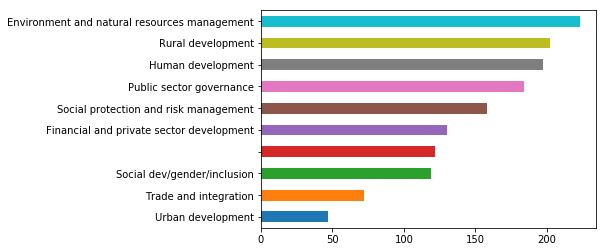

In [3]:
# Load normalize json via  string object and extract project types via normalization
with open('data/world_bank_projects.json') as file:
    json_df = json.loads(file.read())
    projects_df = json_normalize(json_df,'mjtheme_namecode')

# Count the project themes and the extract the top 10
top_10_projects = projects_df.name.value_counts().head(10)
top_10_projects = top_10_projects.sort_values(ascending=True)

# Graph results
top_10_projects.plot(kind='barh')

## Fill in the missing values in the major project themes.

In [8]:
coded_projects = projects_df.sort_values(['code', 'name'])
coded_projects = coded_projects.replace(to_replace='', method='bfill')
projects_df['Themes'] = coded_projects['name']
print(projects_df.head(10))
print('\n')
print(projects_df.info())

  code                                          name  \
0    8                             Human development   
1   11                                                 
2    1                           Economic management   
3    6         Social protection and risk management   
4    5                         Trade and integration   
5    2                      Public sector governance   
6   11  Environment and natural resources management   
7    6         Social protection and risk management   
8    7                   Social dev/gender/inclusion   
9    7                   Social dev/gender/inclusion   

                                         Themes  
0                             Human development  
1  Environment and natural resources management  
2                           Economic management  
3         Social protection and risk management  
4                         Trade and integration  
5                      Public sector governance  
6  Environment and natural resour